# Album-art genre classifier

## Experiment 5:
- Using data fetched by directly using artists listed in artist-v3.yml (ie, without using Spotify's similar artists API)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [43]:
from fastai.widgets import *

In [5]:
classes = ['rock', 'popular']

In [6]:
DATA_PATH = '../local_only_data/exp5'

In [7]:
for class_name in classes:
    !wc -l {DATA_PATH}/{class_name}.txt

1415 ../local_only_data/exp5/rock.txt
1392 ../local_only_data/exp5/popular.txt


In [8]:
MAX_PICS = 1500

In [9]:
for class_name in classes:
    
    print(class_name)
    
    folder = class_name
    file = f'{class_name}.txt'
    
    path = Path(DATA_PATH)
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    
    download_images(path/file, dest, max_pics=MAX_PICS)

rock


popular


In [10]:
BATCH_SIZE = 64

In [11]:
path = Path(DATA_PATH)

In [12]:
tfms = get_transforms(do_flip=False, max_rotate=0.1, max_zoom=0.1, max_lighting=0.2, max_warp=0.1, p_affine= 0.5, p_lighting= 0.5)

In [18]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.12,
        ds_tfms=tfms, size=224, num_workers=4, bs=BATCH_SIZE).normalize(imagenet_stats)

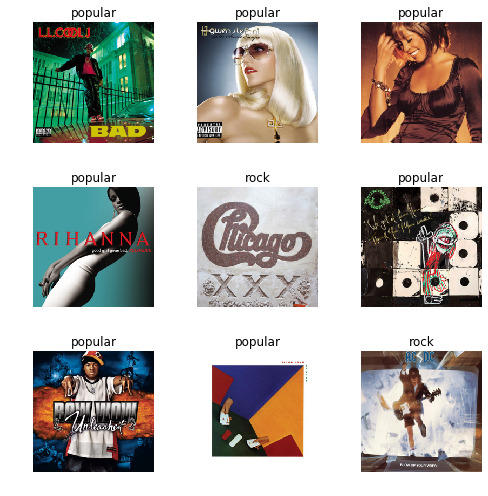

In [19]:
data.show_batch(rows=3, figsize=(7,7))

In [20]:
print(data.classes)
print(f'Training size: {len(data.train_ds)}')
print(f'Validation size: {len(data.valid_ds)}')
print(f'Total: {len(data.train_ds) + len(data.valid_ds)}')

['popular', 'rock']
Training size: 2471
Validation size: 336
Total: 2807


## Training ResNet-50

In [21]:
learn2 = create_cnn(data, models.resnet50, metrics=error_rate)

In [22]:
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


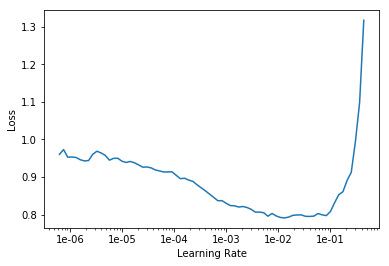

In [23]:
learn2.recorder.plot()

In [24]:
lr = 8e-3

In [ ]:
learn2.fit_one_cycle(4, max_lr=lr)

epoch,train_loss,valid_loss,error_rate


In [ ]:
learn2.save('exp-5-v2-stage-1')

In [10]:
learn2.load('exp-5-v2-stage-1')

In [31]:
learn2.unfreeze()

In [29]:
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


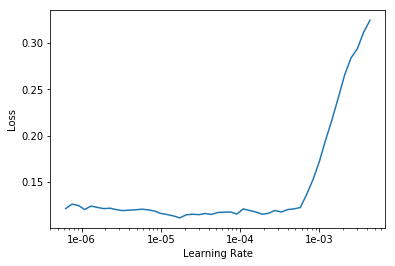

In [30]:
learn2.recorder.plot()

In [32]:
learn2.fit_one_cycle(4, max_lr=8e-5)

epoch,train_loss,valid_loss,error_rate
1,0.122457,0.399234,0.145833
2,0.110215,0.500471,0.175595
3,0.082398,0.446296,0.169643
4,0.049757,0.331546,0.130952


In [33]:
learn2.save('exp-5-stage-2')

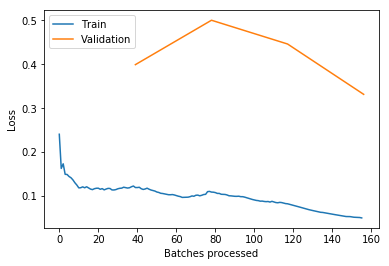

In [34]:
learn2.recorder.plot_losses()

In [35]:
interp = ClassificationInterpretation.from_learner(learn2)

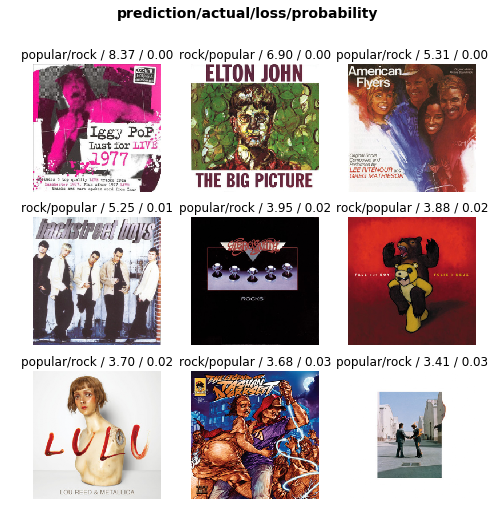

In [36]:
interp.plot_top_losses(9, figsize=(8,8))